In [1]:
from typing import Callable, Any
from numpy import linspace


n = 10000


def error(f: Callable[[float], float], h: Any,
          a: int, b: int) -> float:
    space = linspace(a, b, n)
    c = []
    for x in space:
        c.append(abs(f(x) - h(x)))
    
    return max(c)


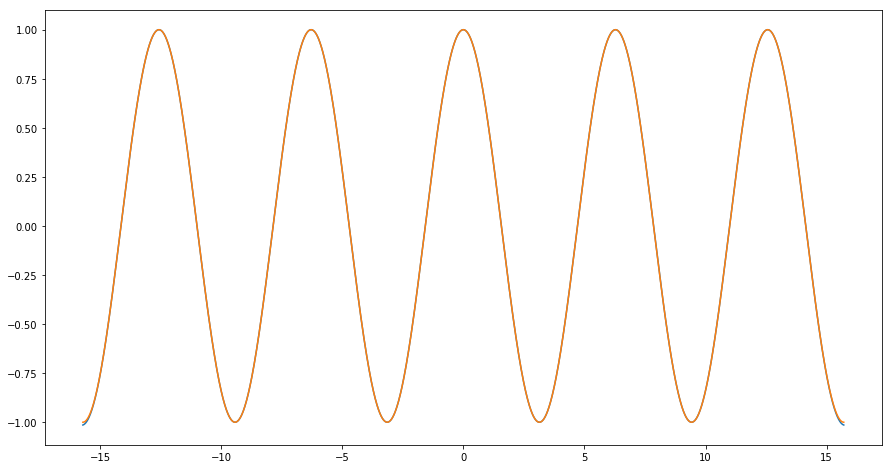

True


In [2]:
# 4.1.


%matplotlib inline

from numpy import pi, cos
from matplotlib.pyplot import figure, plot, show


n1 = 21


def mycos(x: int, num: int = n1) -> int:
    result = 0.
    xx = 1.
    sign = 1.
    fact = 1.
    for k in range(num + 1):
        result += sign * xx / fact
        sign *= -1
        xx *= x**2
        fact *= (2 * k + 1) * (2 * k + 2)
    
    return result


def plot_fun(x_axis: Any, fun: Any) -> None:
    y_axis = []
    for elem_x in x_axis:
        y_axis.append(fun(elem_x))
    plot(x_axis, y_axis)


a1 = -5 * pi
b1 = 5 * pi
x_axis1 = linspace(a1, b1, n)
figure(figsize=(15, 8))
plot_fun(x_axis1, mycos)
plot_fun(x_axis1, cos)
show()
print(error(mycos, cos, a1, b1) < 0.1)


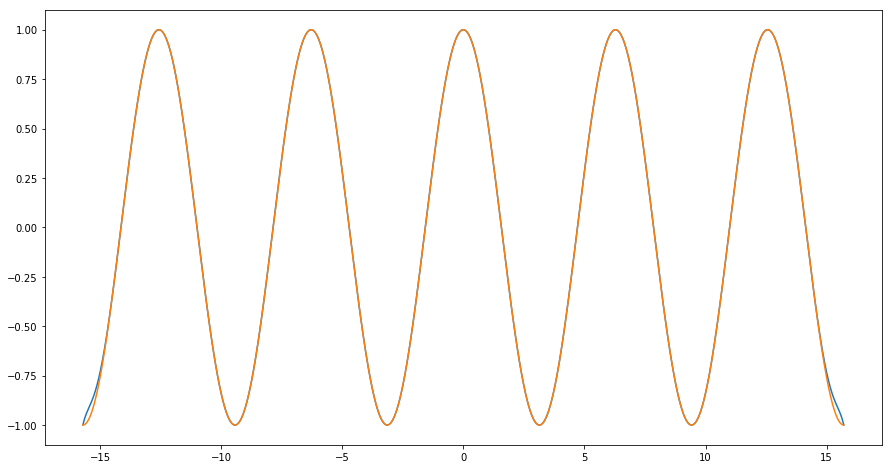

True


In [3]:
# 4.2.


from typing import List
from numpy import polyfit, poly1d


def fun_points(points: Any, fun: Any = cos) -> List[float]:
    result = []
    for point in points:
        result.append(fun(point))
    return result


n2 = 27
p1_points = linspace(a1, b1, n2)
p1 = poly1d(polyfit(p1_points, fun_points(p1_points), n2 - 1))
figure(figsize=(15, 8))
plot_fun(x_axis1, p1)
plot_fun(x_axis1, cos)
show()
print(error(p1, cos, a1, b1) < 0.1)


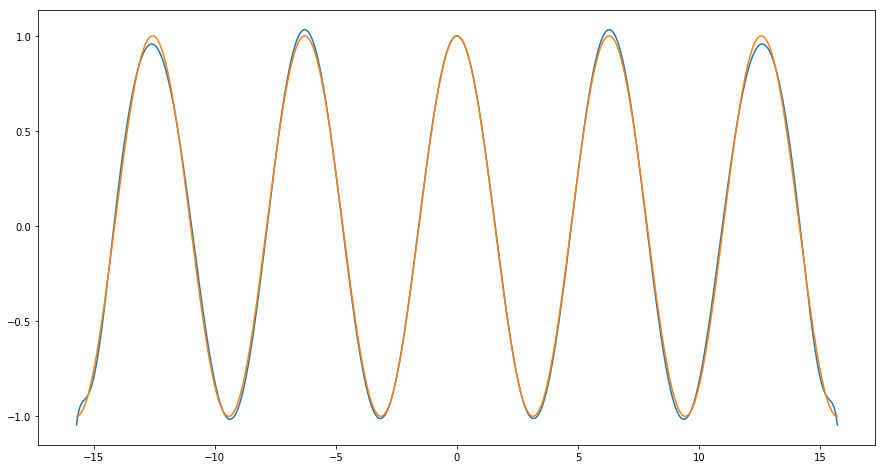

True


In [4]:
# 4.3.


def tch_points(a: float, b: float, num: int) -> List[float]:
    result = []
    for j in range(num):
        result.append((b - a) / 2 *
                      cos((2 * j + 1) / (2 * num) * pi) + (a + b) / 2)
    
    return result


n3 = 19
p2_points = tch_points(a1, b1, n3)
p2 = poly1d(polyfit(p2_points, fun_points(p2_points), n3 - 1))
figure(figsize=(15, 8))
plot_fun(x_axis1, p2)
plot_fun(x_axis1, cos)
show()
print(error(p2, cos, a1, b1) < 0.1)


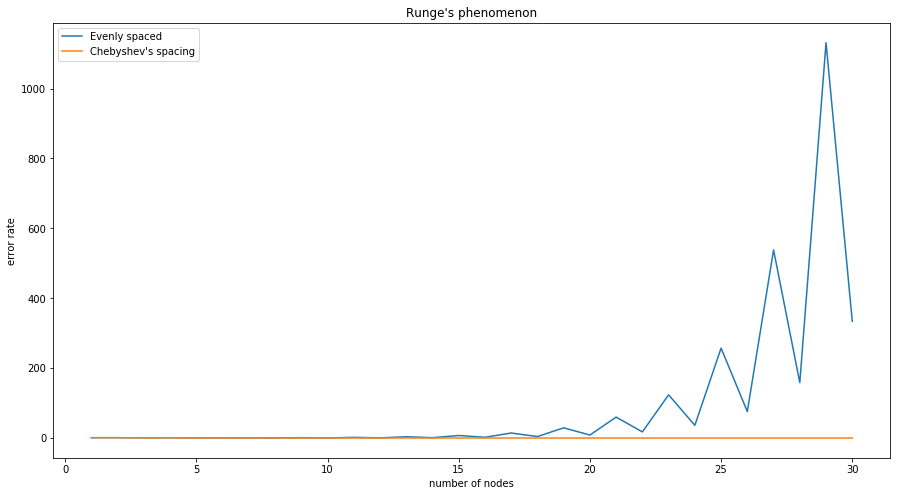

In [5]:
# 4.4.


from matplotlib.pyplot import title, xlabel, ylabel, legend


def f(x: float) -> float:
    return 1 / (1 + x**2)


a2 = -5
b2 = 5
x_axis2 = range(1, 31)
y_axis_eq = []
y_axis_neq = []
for n4 in x_axis2:
    p3_eq_points = linspace(a2, b2, n4)
    p3_eq = poly1d(polyfit(p3_eq_points, fun_points(p3_eq_points, f), n4 - 1))
    p3_neq_points = tch_points(a2, b2, n4)
    p3_neq = poly1d(polyfit(p3_neq_points, fun_points(p3_neq_points, f), n4 - 1))
    y_axis_eq.append(error(p3_eq, f, a2, b2))
    y_axis_neq.append(error(p3_neq, f, a2, b2))
figure(figsize=(15, 8))
plot(x_axis2, y_axis_eq)
plot(x_axis2, y_axis_neq)
title("Runge's phenomenon")
xlabel("number of nodes")
ylabel("error rate")
legend(["Evenly spaced", "Chebyshev's spacing"])
show()